# TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd

## read data

In [2]:
df = pd.read_csv(r'C:\Users\sobia\Downloads\archive (28)\tested.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Analysis 

## understand columns of data 
- PassengerId : it shows id of each p as it shows ticket 
- Fare : it shows price of ticket that was paid 
- Cabin : it shows cabin number of passenger in boat which cabin number is  
- Survived : it shows wether a passenger servived or not with 0 representing "did not survive" and 1 representing "survived."
- Pclass : it shows passenger ticket class
- Name : name of each passenger 
- Sex : it shows gender of passenger (female or male)
- Age : it show how old passengers are
- SibSp : it shows number of sbilings/spouse
- Parch: it shows the number of parents/ childerns
- Ticket : it shows ticket 
- Fare : it shows price of ticket that was paid 
- Cabin : it shows cabin number of passenger in boat which cabin number is 
- Embarked : it shows the port of embarkation  where the passenger boarded the Titanic. It can take one of three values: "C" for Cherbourg, "Q" for Queenstown, and "S" for Southampton

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.shape

(418, 12)

### data cleaning : check the null values in data set

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
df['Age'].mean()

30.272590361445783

### fill the null values with the mean of age column

In [15]:
df['Age'].fillna(30, inplace=True)

In [16]:
df['Age'].isnull().sum()

0

In [17]:
df['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    30.0
414    39.0
415    38.5
416    30.0
417    30.0
Name: Age, Length: 418, dtype: float64

In [19]:
df['Cabin'].isnull().sum()

327

### there are many null values where in data set cabin column is not important column so we remove the cabine column from dataset

In [23]:
df.drop(['Cabin'], axis =1, inplace  = True)

In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [29]:
df['Fare'].mean()

35.6271884892086

In [30]:
df['Fare'].fillna(35, inplace=True)

In [31]:
df['Fare'].isnull().sum()

0

In [33]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [36]:
import seaborn as sns 

<AxesSubplot:xlabel='Sex', ylabel='count'>

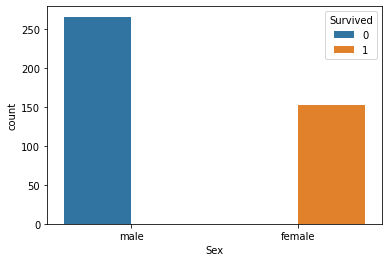

In [38]:
sns.countplot(x='Sex' , data=df, hue='Survived')

In [42]:
df['Age']=df['Age'].astype(int)

In [43]:
df['Age']

0      34
1      47
2      62
3      27
4      22
       ..
413    30
414    39
415    38
416    30
417    30
Name: Age, Length: 418, dtype: int32

<AxesSubplot:xlabel='Sex', ylabel='count'>

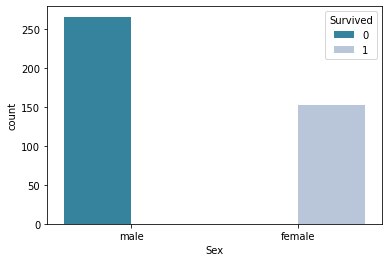

In [50]:
sns.countplot(x='Sex', data=df, hue='Survived', palette = 'PuBuGn_r' )

##### this graph shows that number of male in boat are more than female and 1 shows that they are survived and 0 shows that they are not survived 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

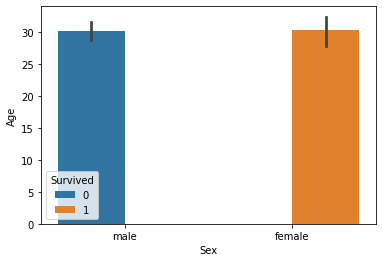

In [51]:
sns.barplot(x='Sex', y='Age', data=df, hue='Survived')

##### this graph shows that  kid to adult female Survived

<AxesSubplot:xlabel='Sex', ylabel='Age'>

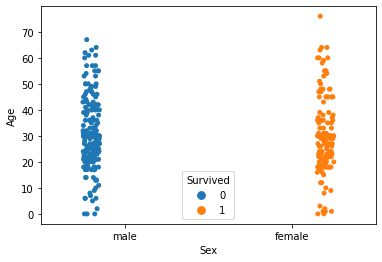

In [54]:
sns.stripplot(data=df,x='Sex', y='Age', hue='Survived', dodge=True)

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

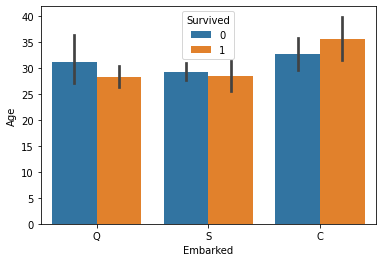

In [75]:
sns.barplot(x='Embarked', y='Age', data=df, hue='Survived')

# Machine Learning 

### Feature extraction

In [57]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30,0,0,359309,8.0500,S


In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [76]:
sex_mapping = {'male': 0, 'female': 1}

df['Sex'] = df['Sex'].map(sex_mapping)

In [78]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",0,30,0,0,359309,8.0500,S


In [80]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [81]:
Embarked_mapping = {'Q': 1, 'S': 2, 'C': 3}

df['Embarked'] = df['Embarked'].map(Embarked_mapping)

In [83]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30,0,0,A.5. 3236,8.0500,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108.9000,3
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",0,30,0,0,359309,8.0500,2


In [84]:
df['Fare']=df['Fare'].astype(int)

In [85]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,2
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9,1
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30,0,0,A.5. 3236,8,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108,3
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7,2
416,1308,0,3,"Ware, Mr. Frederick",0,30,0,0,359309,8,2


In [90]:
df['Ticket'].unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

In [91]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.023245,-0.026751,-0.023245,-0.030648,0.003818,0.043080,0.008340,-0.001026
Survived,-0.023245,1.000000,-0.108615,1.000000,0.001538,0.099943,0.159120,0.191156,-0.037432
Pclass,-0.026751,-0.108615,1.000000,-0.108615,-0.443531,0.001087,0.018721,-0.577438,-0.372344
Sex,-0.023245,1.000000,-0.108615,1.000000,0.001538,0.099943,0.159120,0.191156,-0.037432
Age,-0.030648,0.001538,-0.443531,0.001538,1.000000,-0.079203,-0.045259,0.328407,0.127749
SibSp,0.003818,0.099943,0.001087,0.099943,-0.079203,1.000000,0.306895,0.171884,0.041221
Parch,0.043080,0.159120,0.018721,0.159120,-0.045259,0.306895,1.000000,0.230308,0.067474
Fare,0.008340,0.191156,-0.577438,0.191156,0.328407,0.171884,0.230308,1.000000,0.315937
Embarked,-0.001026,-0.037432,-0.372344,-0.037432,0.127749,0.041221,0.067474,0.315937,1.000000


In [92]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [93]:
feature_columns = [0, 2, 4, 5, 6, 9, 10]

X = df.iloc[:, feature_columns]


In [94]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked
0,892,3,0,34,0,7,1
1,893,3,1,47,1,7,2
2,894,2,0,62,0,9,1
3,895,3,0,27,0,8,2
4,896,3,1,22,1,12,2
...,...,...,...,...,...,...,...
413,1305,3,0,30,0,8,2
414,1306,1,1,39,0,108,3
415,1307,3,0,38,0,7,2
416,1308,3,0,30,0,8,2


In [95]:
targeted_column = [1]
y = df.iloc[:, targeted_column]

In [96]:
y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


### split into 80% training  and 20% testing 

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [100]:
from sklearn import linear_model

In [101]:
model = linear_model.LogisticRegression()

In [103]:
model.fit(Xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
model.fit(Xtest, ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
model.coef_

array([[-3.16666921e-03,  1.07737127e-01,  4.07024612e+00,
         1.34411085e-02,  4.59008288e-02,  1.62680733e-02,
         9.54191580e-02]])

In [106]:
model.intercept_

array([-0.01977675])

In [107]:
y_pred = model.predict(Xtest)

In [108]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  1.0


In [109]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[45  0]
 [ 0 39]]
